# Classification using MNIST Data Set

Classification practice using the MNIST dataset (which maps pixel images to numeric digits)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import pandas as pd

In [2]:
# from sklearn.datasets import fetch_mldata
# mnist = fetch_mldata('MNIST original')

# mldata is depracated, fetching from openml
# https://stackoverflow.com/questions/53096977

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, return_X_y=False)

# wait a few minutes for download to complete...

In [4]:
len(mnist['data'])

70000

### Visualization

In [5]:
X, y = mnist['data'], mnist['target']

In [8]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [12]:
y[60000]

'7'

In [22]:
X[60000]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [13]:
X.shape

(70000, 784)

In [14]:
y.shape

(70000,)

### Finding a particular digit

In [5]:
np.where(y=='4')

(array([    2,     9,    20, ..., 69977, 69987, 69997]),)

*- shows the dataset indices where the digit 4 can be found*

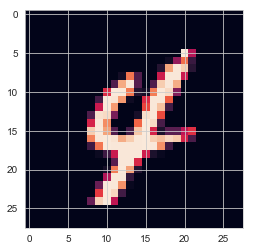

In [6]:
_ = X[69977]
_image = _.reshape(28,28)
plt.imshow(_image);

In [7]:
np.where(y=='0')

(array([    1,    21,    34, ..., 69964, 69983, 69993]),)

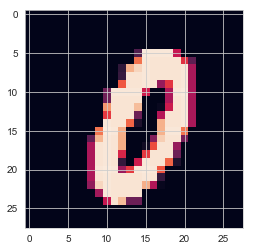

In [8]:
_ = X[34]
_image = _.reshape(28,28)
plt.imshow(_image);

### Split the dataset into two - 60K for training and 10K for testing

In [6]:
split=60000
Xtrain,Xtest, ytrain, ytest = X[:split],X[split:],y[:split],y[split:]

### Shuffle

In [7]:
shuffle_index = np.random.permutation(split)
Xtrain, ytrain = Xtrain[shuffle_index], ytrain[shuffle_index]

In [30]:
shuffle_index

array([43735,  9552,  5818, ..., 41162,  4113, 46899])

In [31]:
Xtrain.shape

(60000, 784)

### Training a binary classifier - 0 or not 0

In [8]:
ytrain0 = (ytrain == '0')

In [33]:
ytrain0

array([False,  True, False, ..., False, False, False])

In [9]:
ytest0 = (ytest == '0')

## Using SGDClassifier

In [10]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(random_state = 0,max_iter=1000,tol=-3)
sgd.fit(Xtrain, ytrain0)

/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=1000,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=0, shuffle=True, tol=-3,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [11]:
sgd.predict(X[34].reshape(1,-1)) # 34 is 0

array([ True])

### Measure performance using cross-validation

In [37]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
skf = StratifiedKFold(n_splits=3, random_state=100)

In [38]:
skf

StratifiedKFold(n_splits=3, random_state=100, shuffle=False)

In [39]:
for train_index, test_index in skf.split(Xtrain, ytrain0):
    sdgc = clone(sgd)
    Xtrain_fold = Xtrain[train_index]
    ytrain_fold = (ytrain0[train_index])
    Xtest_fold = Xtrain[test_index]
    ytest_fold = (ytrain0[test_index])
    sdgc.fit(Xtrain_fold, ytrain_fold)
    
    ypred_fold = sdgc.predict(Xtest_fold)
    n_correct = sum(ypred_fold == ytest_fold)
    print("{0:.4f}".format(n_correct / len(ypred_fold)))

/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


0.9852


/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


0.9862
0.9821


/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [40]:
sgd

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=1000,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=0, shuffle=True, tol=-3,
       validation_fraction=0.1, verbose=0, warm_start=False)

### Cross Validation Score using K-Fold Cross Validation

In [12]:
from sklearn.model_selection import cross_val_score

In [41]:
sgd.predict(X[34].reshape(1,-1))

array([ True])

In [ ]:
ytest0

In [13]:
cross_val_score(sgd, Xtrain, ytrain, cv=3, scoring='accuracy')

/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([0.8644771 , 0.84839242, 0.84382657])

### Confusion Matrix

In [ ]:
from sklearn.model_selection import cross_val_predict

In [15]:
ytrain_pred = cross_val_predict(sgd, Xtrain,ytrain0,cv=3)

/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [16]:
from sklearn.metrics import confusion_matrix

In [17]:
confusion_matrix(ytrain0, ytrain_pred)

array([[53593,   484],
       [  319,  5604]])

### Precision - accuracy of positive predictions
TP - true positive, FP - false positive, TN - true negative, FN - false negative 

$$ precision = \frac{TP}{{TP}+{FP}} $$

$$ recall = \frac{TP}{{TP}+{FN}} $$

$$ f1 = \frac{TP}{{TP}+{\frac{FN+FP}{2}}} $$

In [18]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [19]:
precision_score(ytrain0,ytrain_pred) 

0.9204993429697766

In [20]:
recall_score(ytrain0,ytrain_pred)

0.9461421576903596

In [21]:
f1_score(ytrain0,ytrain_pred)

0.9331446174340188

### Precision / Recall Tradeoff 
$$ precision \propto 1 / recall $$

In [22]:
yscores = sgd.decision_function(X[1000].reshape(1,-1))
yscores

array([1383.59475606])

In [23]:
threshold = 0
y_some_digits_pred = (yscores > threshold)
y_some_digits_pred

array([ True])

In [24]:
threshold = 4000
y_some_digits_pred = (yscores > threshold)
y_some_digits_pred

array([False])

In [25]:
yscores = cross_val_predict(sgd, Xtrain, ytrain0,cv=3,method='decision_function')

/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


(array([1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        3.000e+00, 3.000e+00, 5.000e+00, 4.000e+00, 3.000e+00, 4.000e+00,
        4.000e+00, 3.000e+00, 4.000e+00, 1.400e+01, 2.000e+00, 1.000e+01,
        1.800e+01, 1.100e+01, 2.000e+01, 2.100e+01, 2.900e+01, 3.000e+01,
        3.300e+01, 2.800e+01, 3.700e+01, 6.300e+01, 6.300e+01, 6.800e+01,
        7.200e+01, 1.070e+02, 1.260e+02, 1.320e+02, 1.770e+02, 1.730e+02,
        2.180e+02, 2.460e+02, 3.060e+02, 3.170e+02, 3.900e+02, 4.710e+02,
        5.130e+02, 6.270e+02, 6.820e+02, 7.790e+02, 9.660e+02, 1.118e+03,
        1.313e+03, 1.418e+03, 1.704e+03, 1.863e+03, 1.978e+03, 2.195e+03,
        2.397e+03, 2.572e+03, 2.636e+03, 2.778e+03, 2.778e+03, 2.737e+03,
        2.702e+03, 2.608e+03, 2.519e+03, 2.270e+03, 2.037e+03, 1.693e+03,
        1.474e+03, 1.167e+03, 9.870e+02, 7.390e+02, 5.630e+02, 4.660e+02,
        3.190e+02, 2.980e+02, 2.400e+02, 2.350e+02, 2.960e+02, 3.330e+02,
        3.490e+02, 3.990e+02, 4.610e+0

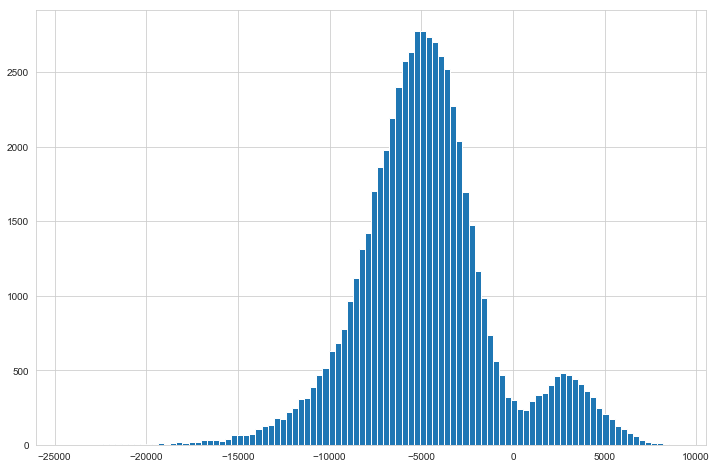

In [26]:
plt.figure(figsize=(12,8))
plt.hist(yscores,bins=100)

In [32]:
from sklearn.metrics import precision_recall_curve

In [33]:
p,c,r = precision_recall_curve(ytrain0,yscores)

In [34]:
def plot_prec_rec_vs_thresh(precisions,recalls,thresholds):
    plt.plot(thresholds, precisions[:-1],"b--",label="Precision")
    plt.plot(thresholds, recalls[:-1],"g--",label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([-0.5,1.5])

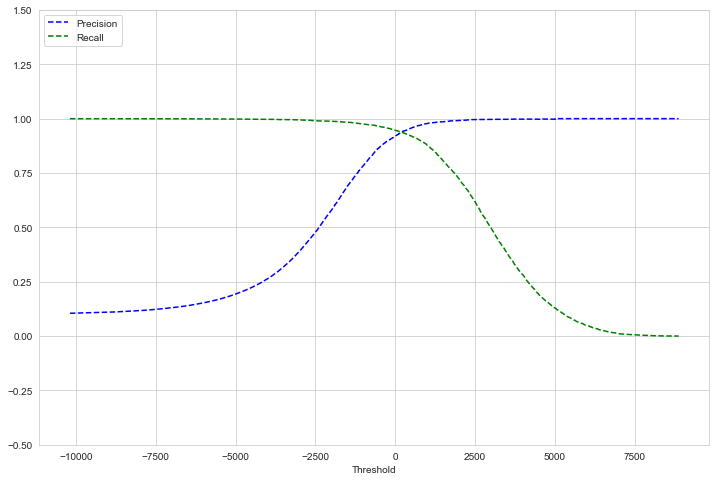

In [35]:
plt.figure(figsize=(12,8))
plot_prec_rec_vs_thresh(p,c,r)
plt.show()

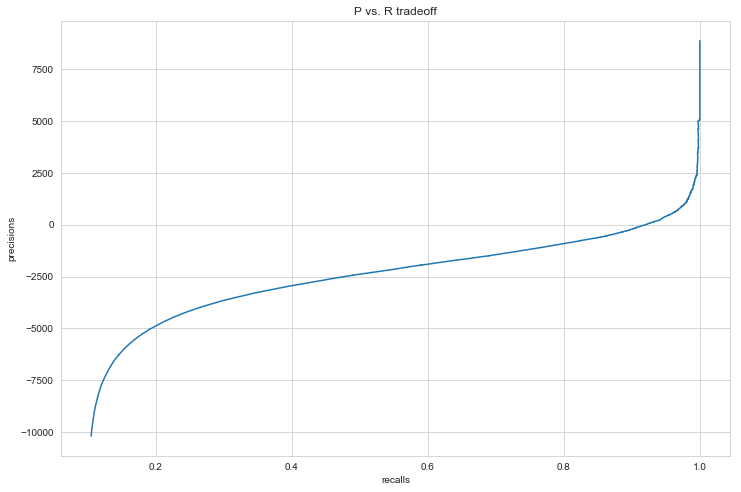

In [42]:
plt.figure(figsize=(12,8))
plt.plot(p[:-1],r)
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('P vs. R tradeoff')
plt.show()

In [40]:
p

array([0.10489312, 0.10487727, 0.10487913, ..., 1.        , 1.        ,
       1.        ])

### Setting high precisions

In [44]:
len(p)

56468

In [45]:
len(thresholds)

NameError: name 'thresholds' is not defined

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(thresholds, precisions[1:])

In [ ]:
idx = len(precisions[precisions < 0.90])
thresholds[idx]
ytrain_pred_90 = (yscores > thresholds[idx])
precision_score(ytrain0,ytrain_pred_90), recall_score(ytrain0,ytrain_pred_90)

### Really high precision

In [170]:
idx = len(precisions[precisions < 0.99])
thresholds[idx]
ytrain_pred_99 = (yscores > thresholds[idx])
precision_score(ytrain0,ytrain_pred_99), recall_score(ytrain0,ytrain_pred_99)

(0.9900051255766273, 0.6522032753672126)

### High recall

In [172]:
idx = len(recalls[recalls < 0.99])
thresholds[idx]
ytrain_pred_99 = (yscores > thresholds[idx])
precision_score(ytrain0,ytrain_pred_99), recall_score(ytrain0,ytrain_pred_99)

(0.13595311961392623, 0.9988181664696945)

### Receiver Operating Characteristics (ROC) Curve

$$ FPR = \frac{FP}{FP+TN} $$


$$ \text{Specificity} = TNR  = 1 - {FPR} $$

In [175]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(ytrain0, yscores)

In [182]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr,tpr,linewidth=2, label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC Curve')

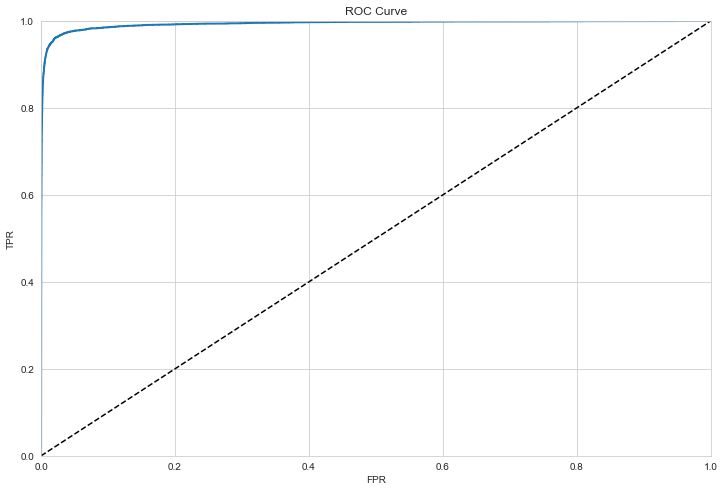

In [184]:
plt.figure(figsize=(12,8))
plot_roc_curve(fpr, tpr)
plt.show()

In [186]:
from sklearn.metrics import roc_auc_score

In [188]:
roc_auc_score(ytrain0, yscores)

0.9934786650650793

**Use PR curve when positive class is rare or you care more about false positives**

**Use ROC curve when negative class is rare or you care more about false negatives**

## Model Comparison

### Random Forest ##

In [189]:
from sklearn.ensemble import RandomForestClassifier

In [191]:
rfc = RandomForestClassifier(random_state=0)

In [194]:
yprobas_forest= cross_val_predict(rfc, Xtrain, ytrain0,cv=3, method='predict_proba')

/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [197]:
yscores_forest = yprobas_forest[:,1]
fpr_forest, tpr_forest, threshold_forest = roc_curve(ytrain0,yscores_forest)

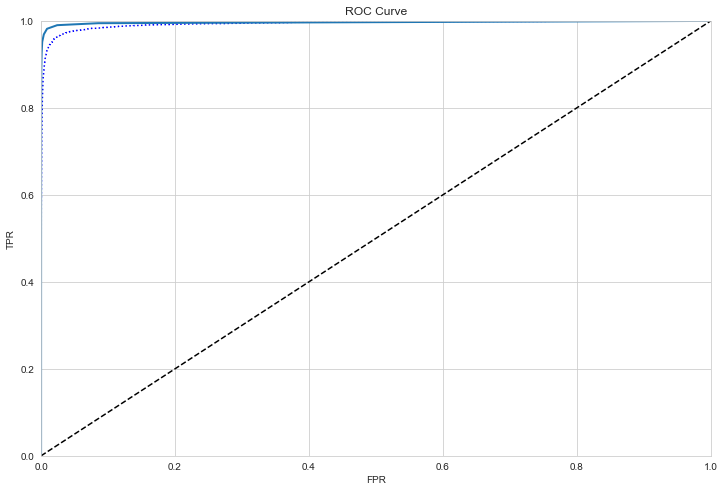

In [199]:
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,"b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest,"Random Forest")
plt.show()

In [200]:
roc_auc_score(ytrain0, yscores_forest)

0.9965474425226869

In [202]:
ytrain_rf=cross_val_predict(rfc, Xtrain, ytrain0,cv=3)

/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/Shared/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [203]:
precision_score(ytrain0,ytrain_rf)

0.9916877484640405

In [204]:
recall_score(ytrain0,ytrain_rf)

0.9265574877595812

In [205]:
f1_score(ytrain0,ytrain_rf)

0.9580169328794623

In [206]:
confusion_matrix(ytrain0, ytrain_rf)

array([[54031,    46],
       [  435,  5488]])